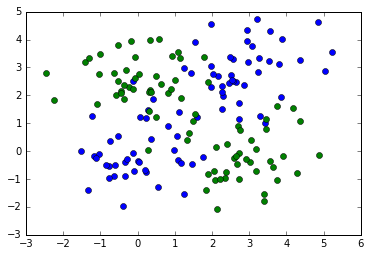

In [66]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

N = 40
sigma = 0.8
Sigma = sigma * np.eye(2)
x1, y1 = np.random.multivariate_normal([0, 0], Sigma, N).T
x2, y2 = np.random.multivariate_normal([3, 3], Sigma, N).T
x1 = np.hstack((x1, x2))
y1 = np.hstack((y1, y2))
plt.plot(x1, y1, 'o')
x3, y3 = np.random.multivariate_normal([0, 3], Sigma, N).T
x4, y4 = np.random.multivariate_normal([3, 0], Sigma, N).T
x2 = np.hstack((x3, x4))
y2 = np.hstack((y3, y4))
plt.plot(x2, y2, 'o')

class1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
class2 = np.concatenate([x2.reshape(-1, 1), y2.reshape(-1, 1)], axis=1)
y = np.ones(4 * N)
y[:2 * N] *= -1
X = np.concatenate((class1, class2))

In [67]:
from rvm import RVM
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
est = RVM(kernel='rbf', n_iter=6, threshold_alpha=1e9)
est.fit(X, y)

-58.45844085


In [69]:
print est.lower_bound

[-23549.28715701  -8596.08907195  -5582.79981754 -20587.36595413
 -54724.80395378 -26653.38479757]


In [64]:
print est.upper_bound

[-115.04441218  -97.30796953  -90.52261507  -87.5617507   -85.4817778
  -84.08724018]


In [65]:
print est.mu_.shape[0], est.mu_

388 [ -1.36602876e-10  -1.90428093e-02  -8.41684509e-01  -6.77394035e-06
  -4.62739916e-02  -7.85654130e-06  -1.58844646e-05  -1.40728710e+00
  -2.95202578e-04  -3.63233787e-01  -8.01798733e-02  -2.68717534e-03
  -7.91417105e-03  -7.34125422e-03   1.74085879e-10  -3.62031602e-04
  -4.54701459e-02  -3.69979309e-01  -8.76083306e-11  -3.86378658e-03
  -3.84004518e-02  -1.11372403e-03  -1.89328326e-02  -6.01694840e-06
  -3.18440681e-01  -4.40897968e-01  -8.47406394e-04  -3.15106541e-09
  -1.28567044e-01   4.86971291e-05  -1.29333878e-02  -7.67578214e-03
  -1.69086716e-02  -2.13995345e-03  -7.67592262e-03  -1.17577166e-04
  -1.76128294e-03  -2.99199168e-01  -3.38958065e-05   6.05637554e-01
  -2.15324053e-05   5.10145435e-11  -2.93357517e-05  -1.61885856e-03
  -9.50069566e-03  -5.16604162e-11  -4.74999843e-02  -1.10468370e-01
  -1.24487335e+00  -5.22382373e-08  -8.90785529e-03  -7.18238268e-03
  -5.21657636e-05  -4.09116124e-02  -4.95006123e-05  -2.98134611e-02
  -6.97192130e-03  -2.44857254

In [58]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y):
    plt.clf()
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()]) + 1
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [59]:
visualize(X, y)

MemoryError: 